# Your first convolutional neural network

# imports

In [1]:
import numpy as np

from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K 

from tensorflow.keras.datasets import cifar10

# data

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [6]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

2022-06-19 21:04:00.921702: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-06-19 21:04:01.004313: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-06-19 21:04:01.005027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-06-19 21:04:01.006346: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild Tenso

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [10]:
input_layer = Input((32,32,3))

# number of parameters = 
# (kernel-x * kernel-y + bias-term) * filters = 
# (3 * 3 * 3 + 1) * 32 = 896 parameters
# output-shape: no-observations, height/strides, width/strides, filters
#   None, 32, 32, 32
x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
# (output-channels * 2-trainable-parameters * 2-derived-parameters) =
# 32 * 2 * 2 = 128 parameters(64 trainable)
# output-shape: same as input
x = BatchNormalization()(x)
# no paremeters, pass through
x = LeakyReLU()(x)

# (kernel-x * kernel-y * previous-channels + bias-term) * filters = 
# (3 * 3 * 32 + 1) * 32 = 9248 parameters
# output-shape: no-observations, height/strides, width/strides, filters
#   None, 16, 16, 32
x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
# (output-channels * 2-trainable-parameters * 2-derived-parameters) =
# (32 * 2 * 2) = 128 parameters (64 trainable) 
x = BatchNormalization()(x)
# no paremeters, pass through
x = LeakyReLU()(x)

# (kernel-x * kernel-y * previous-channels + bias-term) * filters = 
# (3 * 3 * 32 + 1) * 64 = 18496 parameters
# output-shape: no-observations, height/strides, width/strides, filters
#   None, 16, 16, 64
x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
# (output-channels * 2-trainable-parameters * 2-derived-parameters) =
# (64 * 2 * 2) = 256 parameters (128 trainable) 
x = BatchNormalization()(x)
# no paremeters, pass through
x = LeakyReLU()(x)

# (kernel-x * kernel-y * previous-channels + bias-term) * filters = 
# (3 * 3 * 64 + 1) * 64 =  36,928 parameters
# output-shape: no-observations, height/strides, width/strides, filters
#   None, 8, 8, 64
x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
# (output-channels * 2-trainable-parameters * 2-derived-parameters) =
# (64 * 2 * 2) = 256 parameters (128 trainable) 
x = BatchNormalization()(x)
# no paremeters, pass through
x = LeakyReLU()(x)

# no paremeters, pass through
# output-shape: no-observations, height * width/strides * channels
#   None, 8*8*64=
#   None, 4096
x = Flatten()(x)

# (input + bias-term) * output =
# (4096 + 1) * 128 = 524416 parameters
# output-shape: no-observations, output
#  None, 128
x = Dense(128)(x)
# (output-channels * 2-trainable-parameters * 2-derived-parameters) =
# (128 * 2 * 2) = 512 parameters (256 trainable) 
x = BatchNormalization()(x)
# no paremeters, pass through
x = LeakyReLU()(x)
# no paremeters, pass through
x = Dropout(rate = 0.5)(x)

# (input + bias-term) * output =in
# (128 + 1) * 10 = 1290 parameters
# output-shape: no-observations, output
#  None, 10
x = Dense(NUM_CLASSES)(x)
# no paremeters, pass through
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [11]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 16, 16, 32)        0   

# train

In [13]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [14]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

2022-06-19 23:13:18.700515: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2022-06-19 23:13:19.369719: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2022-06-19 23:13:19.532290: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-06-19 23:13:24.789066: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8401
2022-06-19 23:13:30.402285: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1563/1563 [==============================] - 24s 8ms/step - loss: 1.5624 - accuracy: 0.4539 - val_loss: 1.2812 - val_accuracy: 0.5468
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1574 - accuracy: 0.5927 - val_loss: 1.1024 - val_accuracy: 0.6050
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0130 - accuracy: 0.6455 - val_loss: 1.2660 - val_accuracy: 0.5984
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9199 - accuracy: 0.6809 - val_loss: 0.9310 - val_accuracy: 0.6791
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8586 - accuracy: 0.6989 - val_loss: 1.0581 - val_accuracy: 0.6418
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8038 - accuracy: 0.7168 - val_loss: 0.9255 - val_accuracy: 0.6880
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7579 - accuracy: 0.7356 - val_loss: 0.9170 - val_accuracy: 0.6

In [15]:
model.layers[6].get_weights()

[]

# analysis

In [16]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 26ms/step - loss: 0.8149 - accuracy: 0.7229


[0.8148839473724365, 0.7228999733924866]

In [17]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

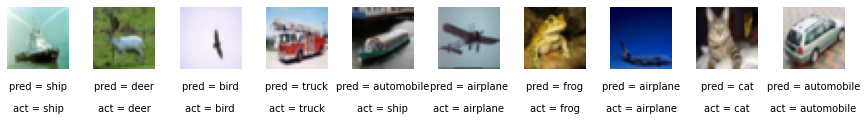

In [18]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
